<a href="https://colab.research.google.com/github/Tanuja-1709/Micro_IT-_Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data=pd.read_csv("/content/IMDB Dataset.csv")

In [3]:
data.dropna(inplace=True)

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

,0
review,0
sentiment,0


In [7]:
data.shape

(500, 2)

In [8]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
def clean_review(review):
  str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [10]:
data['review']=data['review'].apply(clean_review)

In [11]:
#wordcloud

from wordcloud import WordCloud

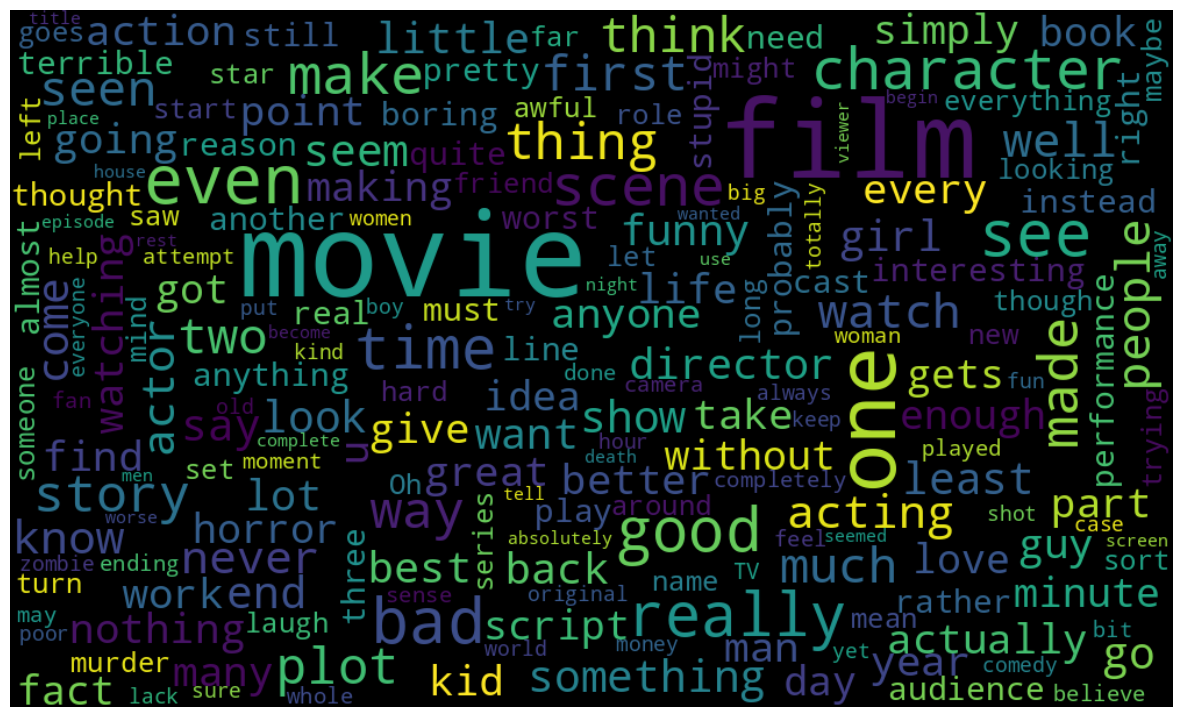

In [12]:
#draw wordcloud

reviews=' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [14]:
reviews=cv.fit_transform(data['review']).toarray()

In [15]:
data['sentiment']=data['sentiment'].replace(['positive'],[1])

In [16]:
data['sentiment']=data['sentiment'].replace(['negative'],[0])

<ipython-input-16-ce9b6ae33c0a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['negative'],[0])


In [17]:
data['sentiment'].value_counts()

,count
sentiment,
0,263
1,237


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
reviews_train,reviews_test,sent_train,sent_test=train_test_split(reviews,data['sentiment'],test_size=0.2)

In [22]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [23]:
y_pred=model.predict(reviews_test)

In [24]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

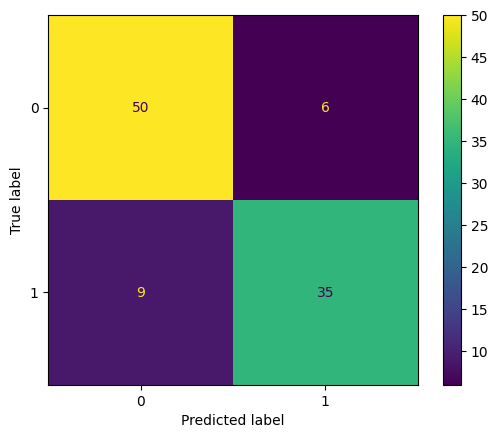

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,y_pred,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
#Caluculate accuracy on the test data
accuracy=accuracy_score(sent_test,y_pred)

In [32]:
print("Accuracy of the test data:", accuracy)

Accuracy of the test data: 0.85


In [34]:
# Calculate accuracy on the training data
y_pred_train = model.predict(reviews_train)
accuracy_train = accuracy_score(sent_train, y_pred_train)

print("Accuracy of the training data:", accuracy_train)

Accuracy of the training data: 0.985


In [40]:
# New review to predict on
new_review_string = "The movie is good"

# Clean the new review
cleaned_new_review = clean_review(new_review_string)

# Transform the new review using the trained TfidfVectorizer
transformed_new_review = cv.transform([cleaned_new_review])

# Predict the sentiment of the new review
prediction = model.predict(transformed_new_review)

# Print the prediction
if (prediction[0] == 1):
  print('The review is Positive')
else:
  print('The review is Negative')

The review is Negative
